G21 CRUZ CRESPO, IGNACIO DE LA GÓMEZ CORTÉS, SERGIO JOSÉ

In [2]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.datasets.samples_generator import make_blobs
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import csv
import pandas as pd

df = pd.read_csv('USArrests.csv')


1.

El archivo USArrest muestra la cantidad de delitos cometidos por cada 100000 habitantes en los diferentes estados de EEUU.
A continuación mostramos la tabla con el nombre y tipo de las variables de USArrest.

In [3]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
df.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

Aquí mostramos la tabla con los estadísticos descriptivos de cada variable incluida UrbanPop, aunque no la usaremos.

In [5]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [24]:

df.corr().loc[:,['Murder','Assault','Rape']]

,Murder,Assault,Rape
Murder,1.000000,0.801873,0.563579
Assault,0.801873,1.000000,0.665241
UrbanPop,0.069573,0.258872,0.411341
Rape,0.563579,0.665241,1.000000


2.

Usaremos las variables en su escala original y no en la transformada, ya que en la escala original podemos relacionar los valores de las variables con lo que representan en la vida real.

In [25]:
def plot_clusters(X, labels=None, centers=None):
    """ Función auxiliar para pintar los puntos de los clusters y, optativamente, sus centros.
    :param X: array de puntos de dos dimensiones (array de array de enteros)
    :param labels: cluster al que pertenece cada punto (array de enteros)
    :param centers: coordenadas de los centroides de los clusters (array de array de enteros)
    """
    
    colors = ['r','g','b','c','y','k','w','m',]
    fig = plt.figure(figsize=(8,8))
    plt.scatter(X[:,0], X[:,1], c=labels, cmap=ListedColormap(colors))
    
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], marker="x", color='k', s=150, linewidths = 5, zorder=10)
        
    plt.show()

In [26]:
murder = df['Murder'].values
rape = df['Rape'].values
assault = df['Assault'].values
K=2

3.

Vemos la correlación entre las variables distribuidas en K=2 clusters porque tenemos 2 variables cuantitativas las cual categorizamos un nivel de delito alto o bajo en función de la relación entre ellas.

Los tres clusters propuestos se han llamdo X (la relación entre Murder y Rape), Y (la relación entre Murder y Assault) y Z (la relación entre Assault y Rape)

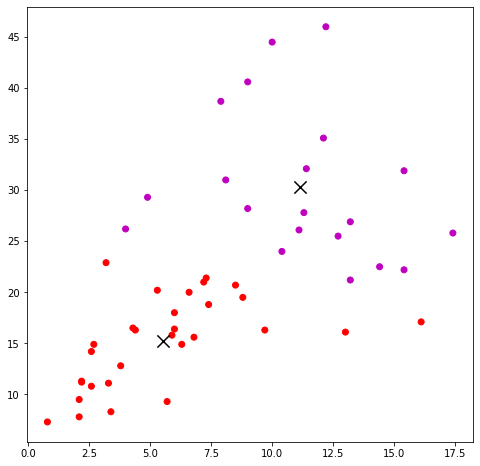

In [27]:
X=np.array(list(zip(murder,rape)))

kmeans = KMeans(n_clusters = K)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

plot_clusters(X,labels,centroids)

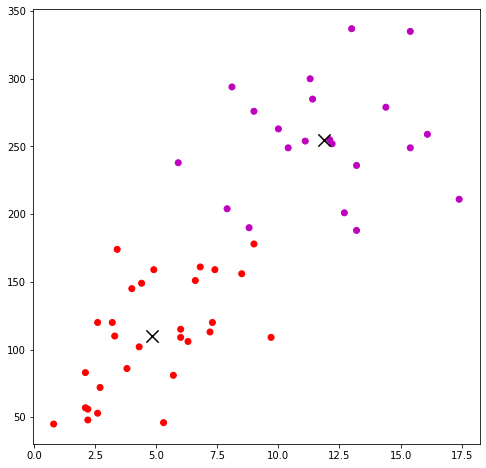

In [28]:
Y=np.array(list(zip(murder,assault)))

kmeans = KMeans(n_clusters = K)
kmeans = kmeans.fit(Y)
labels = kmeans.predict(Y)
centroids = kmeans.cluster_centers_

plot_clusters(Y,labels,centroids)

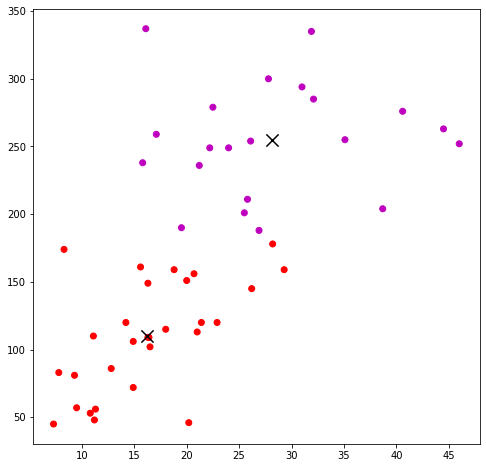

In [29]:
Z=np.array(list(zip(rape,assault)))

kmeans = KMeans(n_clusters = K)
kmeans = kmeans.fit(Z)
labels = kmeans.predict(Z)
centroids = kmeans.cluster_centers_

plot_clusters(Z,labels,centroids)

4.1

Estadístico descriptivo del primer cluster

In [30]:
dfX = pd.DataFrame(data=X, columns=['Murder','Rape'])
dfX = dfX.assign(cluster=pd.Series(data=kmeans.labels_))
dfX

,Murder,Rape,cluster
0,13.2,21.2,1
1,10.0,44.5,1
2,8.1,31.0,1
3,8.8,19.5,1
4,9.0,40.6,1
5,7.9,38.7,1
6,3.3,11.1,0
7,5.9,15.8,1
8,15.4,31.9,1
9,17.4,25.8,1


In [31]:
dfX.groupby(["cluster"]).describe()

Murder                                                    Rape  \
         count       mean       std  min   25%   50%   75%   max count   
cluster                                                                  
0         29.0   4.841379  2.349091  0.8   2.7   4.4   6.6   9.7  29.0   
1         21.0  11.857143  2.962528  5.9  10.0  12.1  13.2  17.4  21.0   

                                                            
              mean       std   min   25%   50%   75%   max  
cluster                                                     
0        16.248276  5.974686   7.3  11.2  16.3  20.2  29.3  
1        28.114286  8.900128  15.8  22.2  26.1  32.1  46.0

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Murder, dtype: object

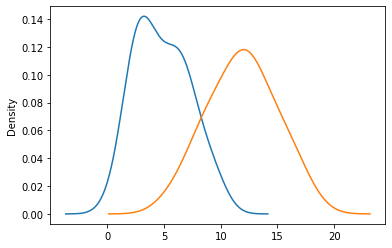

In [32]:
dfX.groupby(["cluster"])["Murder"].plot(kind="density")

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Rape, dtype: object

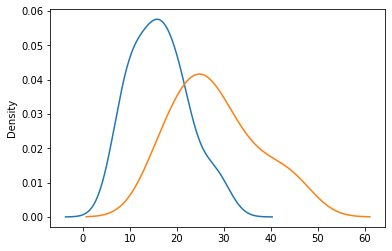

In [38]:
dfX.groupby(["cluster"])["Rape"].plot(kind="density")


4.2

Estadístico descriptivo del segundo cluster

In [39]:
dfY = pd.DataFrame(data=Y, columns=['Murder','Assault'])
dfY = dfY.assign(cluster=pd.Series(data=kmeans.labels_))
dfY

,Murder,Assault,cluster
0,13.2,236.0,1
1,10.0,263.0,1
2,8.1,294.0,1
3,8.8,190.0,1
4,9.0,276.0,1
5,7.9,204.0,1
6,3.3,110.0,0
7,5.9,238.0,1
8,15.4,335.0,1
9,17.4,211.0,1


In [40]:
dfY.groupby(["cluster"]).describe()

Murder                                                   Assault  \
         count       mean       std  min   25%   50%   75%   max   count   
cluster                                                                    
0         29.0   4.841379  2.349091  0.8   2.7   4.4   6.6   9.7    29.0   
1         21.0  11.857143  2.962528  5.9  10.0  12.1  13.2  17.4    21.0   

                                                                   
               mean        std    min    25%    50%    75%    max  
cluster                                                            
0        109.758621  41.321609   45.0   81.0  110.0  149.0  178.0  
1        255.000000  42.169894  188.0  236.0  254.0  279.0  337.0

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Murder, dtype: object

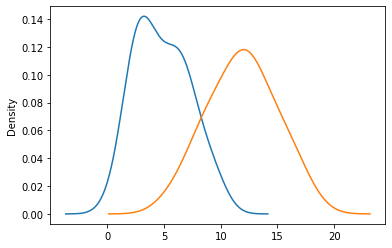

In [41]:
dfY.groupby(["cluster"])["Murder"].plot(kind="density")

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Assault, dtype: object

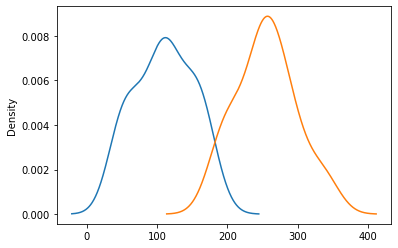

In [42]:
dfY.groupby(["cluster"])["Assault"].plot(kind="density")

4.3

Estadístico descriptivo del tercer cluster

In [43]:
dfZ = pd.DataFrame(data=Z, columns=['Rape','Assault'])
dfZ = dfZ.assign(cluster=pd.Series(data=kmeans.labels_))
dfZ

,Rape,Assault,cluster
0,21.2,236.0,1
1,44.5,263.0,1
2,31.0,294.0,1
3,19.5,190.0,1
4,40.6,276.0,1
5,38.7,204.0,1
6,11.1,110.0,0
7,15.8,238.0,1
8,31.9,335.0,1
9,25.8,211.0,1


In [44]:
dfZ.groupby(["cluster"]).describe()

Rape                                                    Assault  \
        count       mean       std   min   25%   50%   75%   max   count   
cluster                                                                    
0        29.0  16.248276  5.974686   7.3  11.2  16.3  20.2  29.3    29.0   
1        21.0  28.114286  8.900128  15.8  22.2  26.1  32.1  46.0    21.0   

                                                                   
               mean        std    min    25%    50%    75%    max  
cluster                                                            
0        109.758621  41.321609   45.0   81.0  110.0  149.0  178.0  
1        255.000000  42.169894  188.0  236.0  254.0  279.0  337.0

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Rape, dtype: object

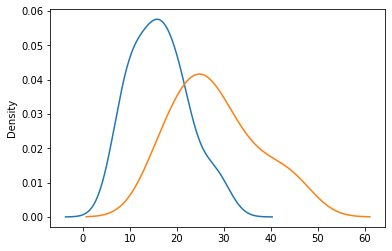

In [45]:
dfZ.groupby(["cluster"])["Rape"].plot(kind="density")

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Assault, dtype: object

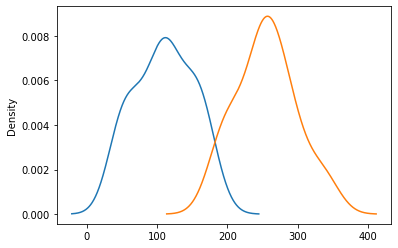

In [46]:
dfZ.groupby(["cluster"])["Assault"].plot(kind="density")

4.4

Gráficos de dispersión de los tres diferentes clusters

C:\Users\ignac\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ignac\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


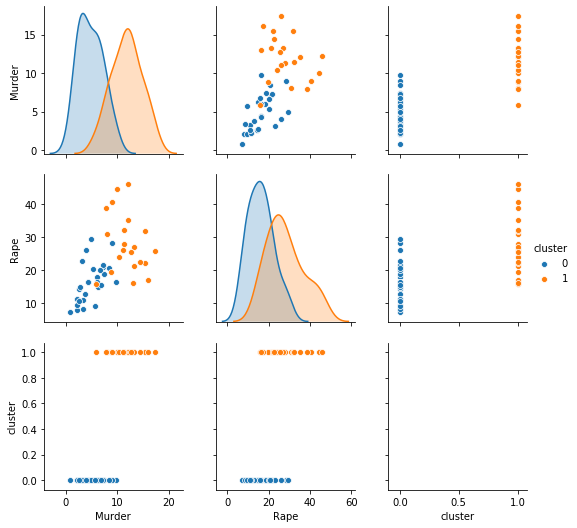

In [47]:
import seaborn as sns

sns.pairplot(dfX,hue="cluster")

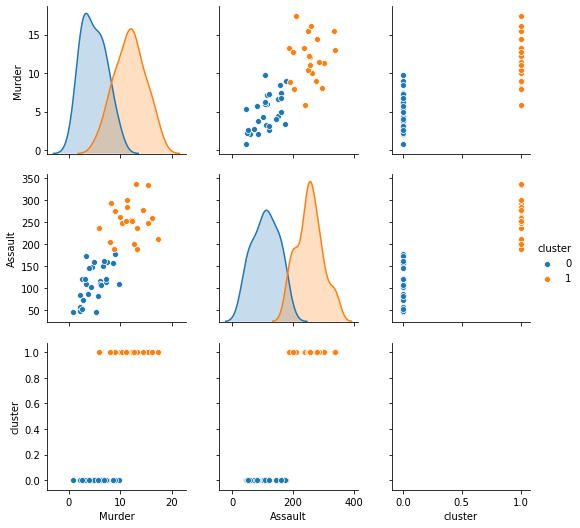

In [48]:
sns.pairplot(dfY,hue="cluster")

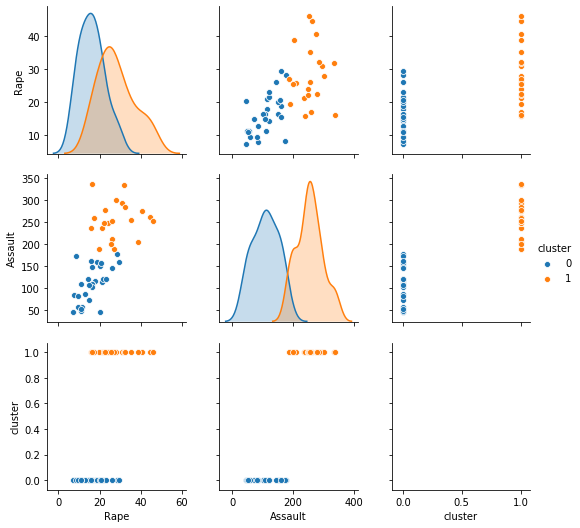

In [49]:
sns.pairplot(dfZ,hue="cluster")

4.5

En el gráfico de la relación Murder y Rape se puede apreciar una mejor diferenciación de clusters a los que estos pertenecen, mientras que en los otros casos se superponen en mayor medida, siendo especialmente confuso el caso de Murder y Rape.